In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import numpy as np
import math
from delay.delay import *
import delay.calculator as calc
from delay.strategy import fA_Smooth, fB_Smooth, showSmoothFunctions

In [16]:
def modelFunctions(N, d = 20):    
    def fA(x):
        return N/4*(math.tanh(-0.6*(x-d))+1)

    def fB(x):
        return N/4*(math.tanh(0.6*(x+d))+1)
    
    return (fA, fB)

def simulate():
    def nextElem(func):
        term = -N/2 if func == max else N/2
        rc = calculateValue(previousA, previousB)
        value = -rc if func == max else rc
        return func(x[current] + value, term)
    
    current = len(x)-1
    for _ in range(0, duration):
        previousA, previousB = fA(x[current - tauA]), fB(x[current - tauB])
        
        prob = calculateProbability(previousA - previousB)
        r = random.random()
        if r <= prob:
            nextElement = nextElem(min) # +1
        else:

            nextElement = nextElem(max) # -1
                
        x.append(nextElement)
        current += 1

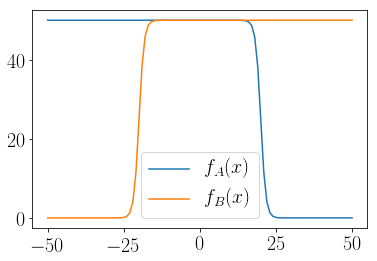

In [3]:
showSmoothFunctions(fA_Smooth, fB_Smooth, 100, d=20, omega=0.6)

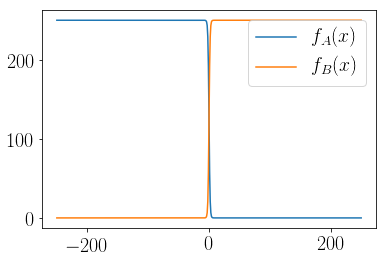

In [4]:
showSmoothFunctions(fA_Smooth, fB_Smooth, 500, d=0, omega=0.6)

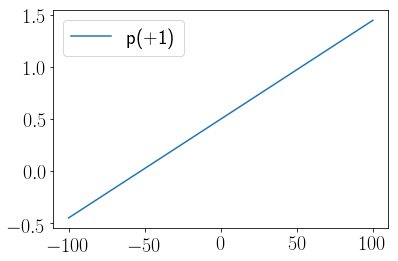

In [5]:
calculateProbability = calc.linear(100)

calc.plot(calculateProbability)

In [23]:
N = 300
tauA = 0
tauB = 0
x = [0] * 100 + [1] 
duration = 10000000
conv = 100
d = 50
(fA, fB) = modelFunctions(N, d = d)

calculateProbability = calc.linear(N, w = 0.99)
print('τ_A, τ_B, µ')
for i in range(0, 11):
    for j in range(0, 11):
        (tauA, tauB) = (i * 10, j * 10)
        x = x[:101]
        
        simulate()
        print(tauA, ', ', tauB, ', ', np.mean(x[100*conv:]))


    

τ_A, τ_B, µ
0 ,  0 ,  0.4546609688931073
0 ,  10 ,  1.3087398215493518
0 ,  20 ,  2.6063815571033766
0 ,  30 ,  5.277931924812372
0 ,  40 ,  5.714248634723512
0 ,  50 ,  7.764580458195568
0 ,  60 ,  8.228474066478407
0 ,  70 ,  8.881676871935529
0 ,  80 ,  10.2961034127683
0 ,  90 ,  11.871898292119369
0 ,  100 ,  11.87823216201718
10 ,  0 ,  -1.593969570477816
10 ,  10 ,  0.009852653141344618
10 ,  20 ,  2.5151400371227477
10 ,  30 ,  2.96474790395012
10 ,  40 ,  4.493240959225537
10 ,  50 ,  5.032876544491392
10 ,  60 ,  7.592139158553052
10 ,  70 ,  8.264750376397595
10 ,  80 ,  9.240208982872145
10 ,  90 ,  10.733586076857481
10 ,  100 ,  10.221589851794292
20 ,  0 ,  -2.8386478775339707
20 ,  10 ,  -1.1411513256973078
20 ,  20 ,  -0.2720165692018529
20 ,  30 ,  1.3084429276540848
20 ,  40 ,  3.1496191079549645
20 ,  50 ,  4.328872050442733
20 ,  60 ,  5.676982545021317
20 ,  70 ,  6.457435915813063
20 ,  80 ,  7.747764011595078
20 ,  90 ,  8.200647120584668
20 ,  100 ,  7.92018188

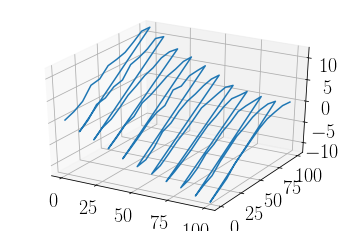

In [29]:
tauAs = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
tauBs = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
mus = [ 0.4546609688931073, 1.3087398215493518, 2.6063815571033766, 5.277931924812372, 5.714248634723512, 7.764580458195568, 8.228474066478407, 8.881676871935529, 10.2961034127683, 11.871898292119369, 11.87823216201718,-1.593969570477816, 0.009852653141344618, 2.5151400371227477, 2.96474790395012, 4.493240959225537, 5.032876544491392, 7.592139158553052, 8.264750376397595, 9.240208982872145, 10.733586076857481, 10.221589851794292,-2.8386478775339707,-1.1411513256973078,-0.2720165692018529, 1.3084429276540848, 3.1496191079549645, 4.328872050442733, 5.676982545021317, 6.457435915813063, 7.747764011595078, 8.200647120584668, 7.9201818880509816,-4.2504344050175265,-2.7093004365020934,-0.8887692927228663,-0.10589792835928286, 2.00813895675329, 2.7774591067697916, 3.9049379981243435, 5.072693559354405, 5.67578235695515, 6.514176082904467, 6.583633238542833,-5.926209454739246,-4.396942633512914,-2.7844732500702447,-0.9512855775932596, 0.3446032227301806, 0.921930919417131, 3.4836359512281208, 3.360817172919473, 4.738385427734915, 4.953397267955549, 5.083810363879204,-7.090340027593315,-6.659244285918631,-4.887222761811918,-2.37045721559772,-1.4882809493117237, 0.279774849123147, 1.4767957801427634, 2.1189410397352337, 3.005352498438204, 3.5473650366497798, 3.4573581388216197,-8.132957714841922,-7.3892238927314144,-5.792006407142431,-4.053864220191568,-2.6512413638260512,-1.140789167196608, 0.541705534308412, 1.0912058847052697, 1.6801608912662644, 2.2060943127602015, 1.6271584241240404,-9.205302028477991,-8.069343743371563,-6.718870109521415,-5.285577092764127,-3.5373729454787295,-1.9179971253543884,-0.9010200197175183, 0.36259303084122974, 1.169736221886045, 0.9198740833551132, 0.7741047863279861,-9.957426556548327,-9.240093268326316,-7.7742906703345644,-5.647369631197923,-4.478855519078335,-2.739897124163209,-1.6180608184041383,-0.15373408136714534, 0.10015284129760049, 0.1532229754233716, 0.19162819274800125,-11.16692563969073,-9.851181985046997,-8.856624872961746,-6.629107253270012,-4.888808131169045,-3.121724094681325,-2.097840952759136,-0.8542523243758997,-0.1642152566825901, 0.10295441457498777,-0.33878646472142776,-11.895348705683757,-10.39788276414823,-8.831520822462155,-6.432234568999853,-4.907516050138032,-3.276887691125445,-1.741263777012865,-0.6068444152866923,-0.1011906686428896, 0.3184114955394345, 0.10057846262014769]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.imshow(tauAs, tauBs, mus);


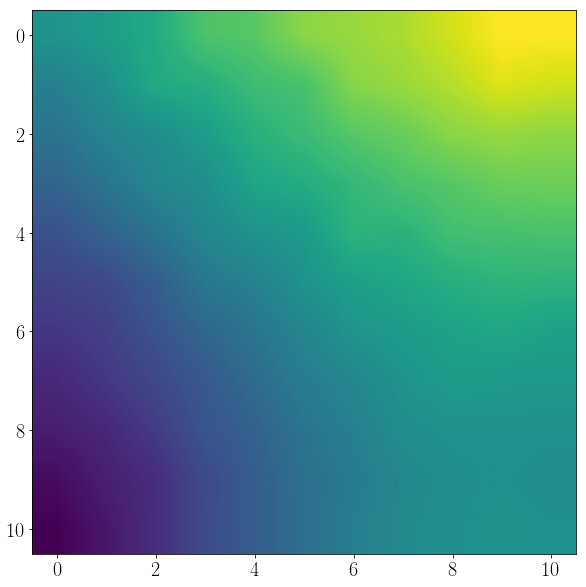

In [39]:
l = 11
Mus = np.array(mus).reshape(l, l)
plt.figure(figsize=(10,10))
plt.imshow(Mus, interpolation='bilinear')
plt.show();

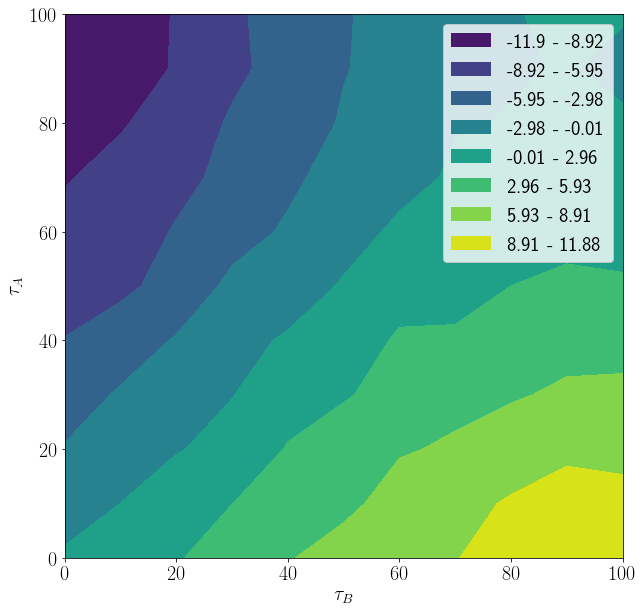

In [64]:
space = np.linspace(0, 100, num=11)
plt.figure(figsize=(10,10))
cs = plt.contourf(space, space, Mus);

proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) 
    for pc in cs.collections]

minimum = np.min(mus)
maximum = np.max(mus)
n = 8
s1 = np.round(np.linspace(minimum, maximum, num=n+1)[:n], decimals=2)
s2 = np.round(np.linspace(minimum, maximum, num=n+1)[1:], decimals=2)
levels = [' - '.join(map(str, [s1[i], s2[i]])) for i in range(0, n)]

plt.ylabel(r'$\tau_A$')
plt.xlabel(r'$\tau_B$')
plt.legend(proxy, levels);

[<matplotlib.patches.Rectangle object at 0x7fad6c7259e8>, <matplotlib.patches.Rectangle object at 0x7fad6c752c50>, <matplotlib.patches.Rectangle object at 0x7fad6c752da0>, <matplotlib.patches.Rectangle object at 0x7fad6c752eb8>, <matplotlib.patches.Rectangle object at 0x7fad6c752fd0>, <matplotlib.patches.Rectangle object at 0x7fad6c737128>, <matplotlib.patches.Rectangle object at 0x7fad6c737240>, <matplotlib.patches.Rectangle object at 0x7fad6c737358>]
